# Задание 6. Прогнозирование с помощью метода стохастической аппроксимации

In [1]:
import os
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
dataS = pd.read_excel('data.xls', sheet_name='Sales')
dataP = pd.read_excel('data.xls', sheet_name='Prices')
dataI = pd.read_excel('data.xls', sheet_name='Income')

In [7]:
sales = dataS.values[1, 2:]
prices = dataP.values[1, 2:]
income = dataI.values[1, 2:]

In [5]:
model = LinearRegression()

In [9]:
X = list(zip(income, prices))

In [10]:
y = sales

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

14606.467102122335
[ -0.29252344 150.2686991 ]


$$ Sales = 14606.47 -0.293  Income + 150.27  Prices $$

In [13]:
a0=[model.intercept_]
a0

[14606.467102122335]

In [15]:
a1=[model.coef_[0]]
a1

[-0.29252344161861876]

In [16]:
a2=[model.coef_[1]]
a2

[150.268699098447]

In [18]:
sales_for = a0 +a1 * income + a2 * prices

In [19]:
error = sales - sales_for

In [20]:
k = len(error)
nu = sum(abs(error)) / k
gamma = abs((abs(error) - nu) / error) / k

In [21]:
for i in range(1, k):
    if abs(error[i - 1]) > nu:
        a0.append(a0[i - 1] + gamma[i - 1] * error[i - 1])
        a1.append(a1[i - 1] + gamma[i - 1] / income[i - 1])
        a2.append(a2[i - 1] + gamma[i - 1] * error[i - 1] / prices[i - 1])
    else:
        a0.append(a0[i - 1])
        a1.append(a1[i - 1])
        a2.append(a2[i - 1])  

In [23]:
borders = []
for i in range(k):
    borders.append([sales_for[i] - nu, sales_for[i] + nu])

In [24]:
sales_sa = []
for i in range(k):
    sales_sa = a0[i] + a1[i] * income + a2[i] * prices

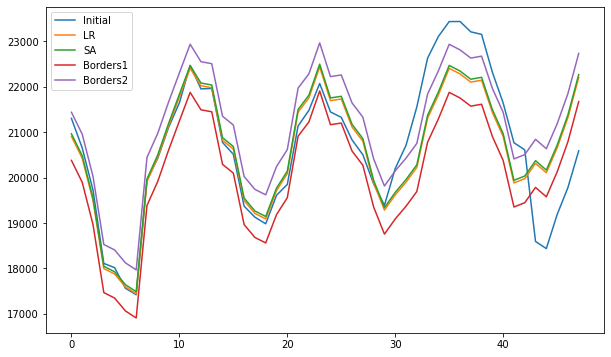

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(pd.DataFrame(sales))
plt.plot(pd.DataFrame(sales_for))
plt.plot(pd.DataFrame(sales_sa))
plt.plot(pd.DataFrame(borders)[[0]])
plt.plot(pd.DataFrame(borders)[[1]])
plt.legend(['Initial', 'LR', 'SA', 'Borders1', 'Borders2'])
plt.show()